<a href="https://colab.research.google.com/github/currencyfxjle/Analitica_de_Redes_Sociales/blob/main/Analitica_de_Redes_Sociales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import networkx as nx

# Cargar el archivo (ajusta el método de carga según el formato exacto del archivo)
# Por ejemplo, si es un archivo de texto plano que puedes tratar como un CSV:
df = pd.read_csv('/content/email-enron-only.mtx', sep=" ", header=None, names=['sender', 'receiver'])



In [3]:
df.head()

,sender,receiver
0,17,1
1,72,1
2,3,2
3,19,2
4,20,2


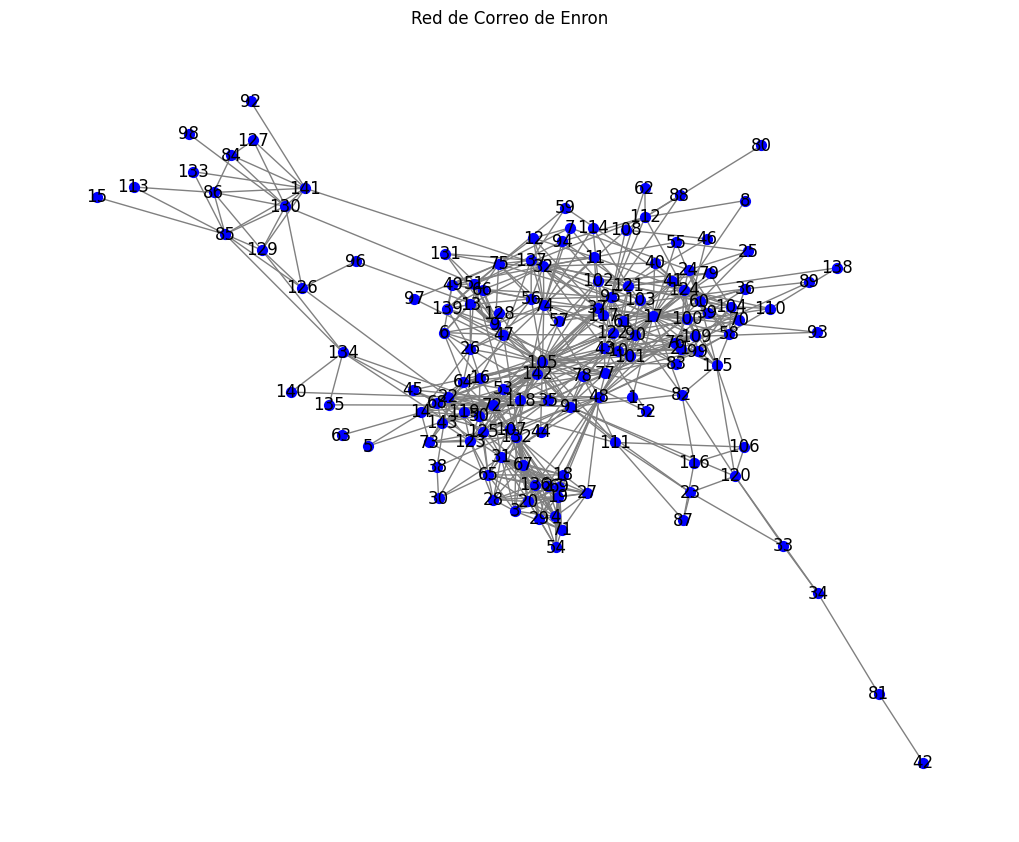

Diámetro de la red: 8
Nodos con mayor centralidad de grado: [105, 17, 95, 48, 132]


In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.io import mmread  # Importar si el archivo .mtx necesita ser leído como una matriz dispersa

df = pd.read_csv('/content/email-enron-only.mtx', sep=" ", header=None, names=['sender', 'receiver'])

# Crear una red no dirigida a partir del DataFrame
G = nx.from_pandas_edgelist(df, 'sender', 'receiver', create_using=nx.Graph())

# Visualizar la red
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Posicionamiento de nodos
nx.draw(G, pos, with_labels=True, node_size=50, node_color='blue', edge_color='grey')
plt.title('Red de Correo de Enron')
plt.show()

# Análisis de distancias en la red
print("Diámetro de la red:", nx.diameter(G))

# Análisis de resiliencia - Aquí podrías querer analizar cómo la red responde a fallos, como eliminar nodos aleatoriamente

# Análisis de centralidades
degree_centrality = nx.degree_centrality(G)
# Imprimir los nodos con mayor centralidad de grado
print("Nodos con mayor centralidad de grado:", sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5])


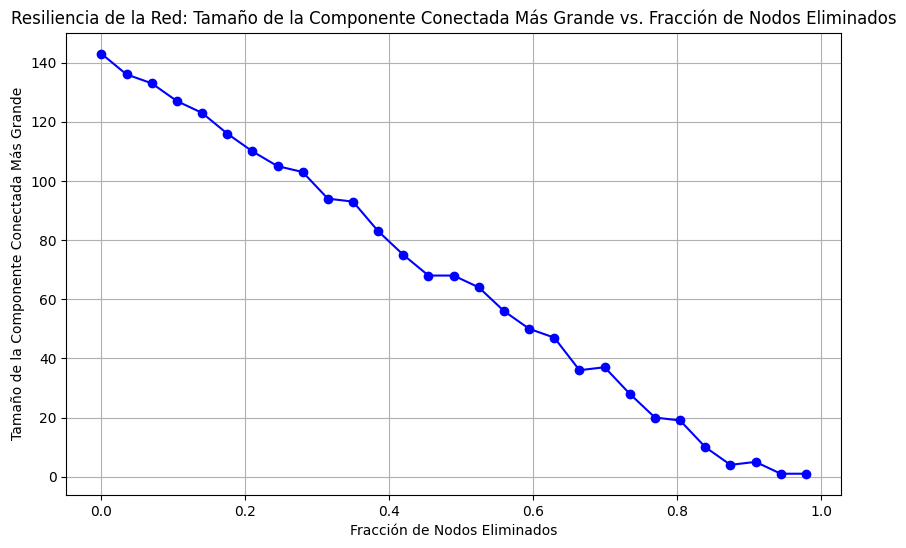

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Supongamos que G es tu red de Enron ya creada

def plot_network_resilience(G, iterations=100, step=5):
    original_size = len(G)
    sizes = []
    removal_fraction = []

    for i in range(0, original_size, step):
        # Copia la red para no alterar la original
        G_temp = G.copy()
        # Eliminar nodos aleatoriamente
        nodes_to_remove = np.random.choice(G_temp.nodes(), size=i, replace=False)
        G_temp.remove_nodes_from(nodes_to_remove)

        # Calcular el tamaño de la componente conectada más grande
        largest_cc = max(nx.connected_components(G_temp), key=len)
        sizes.append(len(largest_cc))
        removal_fraction.append(i/original_size)

        if len(G_temp) == 0:  # Si ya no quedan nodos, salir del bucle
            break

    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    plt.plot(removal_fraction, sizes, marker='o', linestyle='-', color='b')
    plt.title('Resiliencia de la Red: Tamaño de la Componente Conectada Más Grande vs. Fracción de Nodos Eliminados')
    plt.xlabel('Fracción de Nodos Eliminados')
    plt.ylabel('Tamaño de la Componente Conectada Más Grande')
    plt.grid(True)
    plt.show()

# Ejecutar la simulación de resiliencia en la red de Enron
plot_network_resilience(G)
